### Investigate 3 json files (users, receipts and brands) for detecting any data quality

In [1]:
# library required
import pandas as pd
import json

Please change file path as per file location in your system

Converts three json files to pandas dataframe

In [2]:
users = [json.loads(line) for line in open('users.json', 'r')]
users = pd.json_normalize(users)
users.head()

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12


In [3]:
brands = [json.loads(line) for line in open('brands.json', 'r')]
brands = pd.json_normalize(brands)
brands.head()

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


In [4]:
receipts = [json.loads(line) for line in open('receipts.json', 'r')]
receipts = pd.json_normalize(receipts)
receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


Checking users data file

Step 1: Checking the consistency of date column whether they are not in future

In [5]:
users['createdDate.$date_converted'] = pd.to_datetime(users['createdDate.$date'],unit='ms')
users['lastLogin.$date_converted'] = pd.to_datetime(users['lastLogin.$date'],unit='ms')

dates = users.loc[users['createdDate.$date_converted'] >= '2022-11-19']
len(dates)

0

In [6]:
dates = users.loc[users['lastLogin.$date_converted'] >= '2022-11-19']
len(dates)

0

## Consistent Dates

#### Frequence distribution for categorical variables

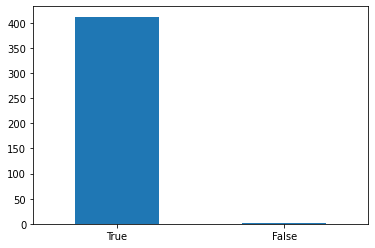

In [ ]:
users['active'].value_counts().plot.bar(rot=0)

In [ ]:
my_tab = pd.crosstab(index=users["active"],  # Make a crosstab
                     columns="count")        # Name the count column
my_tab

col_0,count
active,
False,1
True,494


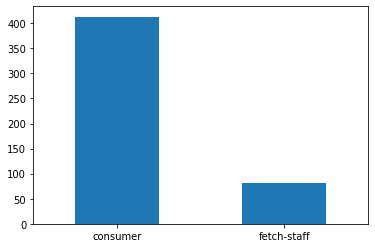

In [ ]:
users['role'].value_counts().plot.bar(rot=0)

In [ ]:
my_tab = pd.crosstab(index=users["role"],  # Make a crosstab
                     columns="count")      # Name the count column

my_tab

col_0,count
role,
consumer,413
fetch-staff,82


####As it was mentioned in the s3 question statement that role: constant value set to 'CONSUMER' in the dataset info, I picked some inconsistency here, and fetch staff should be kept in different database table under the name of employee.

In [7]:
employee = users[users["role"] == 'fetch-staff']
employee.head(5)

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date,createdDate.$date_converted,lastLogin.$date_converted
395,True,fetch-staff,NaN,WI,59c124bae4b0299e55b0f330,1505830074302,1.612803e+12,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936
396,True,fetch-staff,NaN,WI,59c124bae4b0299e55b0f330,1505830074302,1.612803e+12,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936
397,True,fetch-staff,NaN,WI,59c124bae4b0299e55b0f330,1505830074302,1.612803e+12,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936
398,True,fetch-staff,NaN,WI,59c124bae4b0299e55b0f330,1505830074302,1.612803e+12,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936
399,True,fetch-staff,NaN,WI,59c124bae4b0299e55b0f330,1505830074302,1.612803e+12,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936


In [8]:
users = users[users["role"] == 'consumer']
users.head(5)

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date,createdDate.$date_converted,lastLogin.$date_converted
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12,2021-01-03 15:25:30.554,2021-01-03 15:25:30.596999936
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872


In [9]:
len(users.index)

413

In [10]:
# Checking number of unique count in '_id.$oid'
users['_id.$oid'].nunique()

204

Hence, we can conclude there are more than twice repititions of  '_id.$oid', so it could not the primary key if the same dataset is used.



Lets try removing the duplicates

In [11]:
uniqueusers = users.drop_duplicates()
uniqueusers.head(5)

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date,createdDate.$date_converted,lastLogin.$date_converted
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12,2021-01-03 15:25:30.554,2021-01-03 15:25:30.596999936
6,True,consumer,Email,WI,5ff1e1e8cfcf6c399c274ad9,1609687528354,1.609688e+12,2021-01-03 15:25:28.354,2021-01-03 15:25:28.392000000
7,True,consumer,Email,WI,5ff1e1b7cfcf6c399c274a5a,1609687479626,1.609687e+12,2021-01-03 15:24:39.626,2021-01-03 15:24:39.664999936
9,True,consumer,Email,WI,5ff1e1f1cfcf6c399c274b0b,1609687537564,1.609688e+12,2021-01-03 15:25:37.564,2021-01-03 15:25:37.599000064


In [12]:
len(uniqueusers.index)

204

In [13]:
# Checking number of unique count in '_id.$oid' in new dataset
uniqueusers['_id.$oid'].nunique()

204

In [14]:
len(employee)

82

In [15]:
employee['_id.$oid'].nunique()

8

In [16]:
uniqueemployee = employee.drop_duplicates()
len(uniqueemployee)

8

Hence, as the row count and unique count of '_id.$oid', thus now it can be used as a primary key for users and employee

#### checking brands dataset

In [17]:
brands.head(5)

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


In [18]:
len(brands)

1167

In [19]:
# Checking number of unique values in '_id.$oid'
brands['_id.$oid'].nunique()

1167

###Hence, '_id.$oid' can be used as primary key in brands dataset,Consistent data

In [20]:
# Checking number of unique values in 'barcode'
brands['barcode'].nunique()

1160

barcode have some duplicates. It cant be treated as primary key

##Checking categorical values frequencies

In [21]:
my_tab = pd.crosstab(index=brands["category"],  # Make a crosstab
                     columns="count")      # Name the count column

my_tab

col_0,count
category,
Baby,18
Baking,369
Beauty,9
Beauty & Personal Care,6
Beer Wine Spirits,90
Beverages,63
Bread & Bakery,5
Breakfast & Cereal,40
Candy & Sweets,71


In [22]:
my_tab = pd.crosstab(index=brands["topBrand"],  # Make a crosstab
                     columns="count")      # Name the count column

my_tab

col_0,count
topBrand,
False,524
True,31


No, specific inference can be calculated from above frequency distribution

No date columns are there, hence date consistency cant be checked

Brands data is consistent and doesn't require any specific change.

#### Checking receipts dataset

In [23]:
receipts.head(5)

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


In [24]:
len(receipts)

1119

In [25]:
receipts['_id.$oid'].nunique()

1119

###Hence, '_id.$oid' can be used as primary key in receipts dataset, Consistent data

No categorical value to check any inconsistency in  frequencies

In [26]:
# date consistencies
receipts['createDate.$date_converted'] = pd.to_datetime(receipts['createDate.$date'],unit='ms')
receipts['dateScanned.$date_converted'] = pd.to_datetime(receipts['dateScanned.$date'],unit='ms')
receipts['finishedDate.$date_converted'] = pd.to_datetime(receipts['finishedDate.$date'],unit='ms')
receipts['modifyDate.$date_converted'] = pd.to_datetime(receipts['modifyDate.$date'],unit='ms')
receipts['pointsAwardedDate.$date_converted'] = pd.to_datetime(receipts['pointsAwardedDate.$date'],unit='ms')
receipts['purchaseDate.$date_converted'] = pd.to_datetime(receipts['purchaseDate.$date'],unit='ms')

In [27]:
dates = receipts.loc[receipts['createDate.$date_converted'] >= '2022-11-19']
len(dates)

0

In [28]:
dates = receipts.loc[receipts['dateScanned.$date_converted'] >= '2022-11-19']
len(dates)

0

In [29]:
dates = receipts.loc[receipts['finishedDate.$date_converted'] >= '2022-11-19']
len(dates)

0

In [30]:
dates = receipts.loc[receipts['pointsAwardedDate.$date_converted'] >= '2022-11-19']
len(dates)

0

In [31]:
dates = receipts.loc[receipts['modifyDate.$date_converted'] >= '2022-11-19']
len(dates)

0

In [32]:
dates = receipts.loc[receipts['purchaseDate.$date_converted'] >= '2022-11-19']
len(dates)

0

Consistent date in all the date columns

##Receipts data is consistent and doesn't require any specific change.